# Figures - body
---
### Load the SAMI dataset

In [22]:
# Imports
import sys
import os 
import numpy as np
import pandas as pd
from astropy.visualization import hist

from spaxelsleuth.loaddata.sami import load_sami_galaxies
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram
from spaxelsleuth.plotting.plottools import vmin_fn, vmax_fn, label_fn, cmap_fn
from spaxelsleuth.plotting.plottools import bpt_colours, bpt_labels, bpt_ticks
from spaxelsleuth.plotting.plottools import morph_labels, morph_ticks
from spaxelsleuth.plotting.plottools import ncomponents_labels, ncomponents_colours
from spaxelsleuth.plotting.plottools import component_labels, component_colours
from spaxelsleuth.plotting.plotgalaxies import plot2dhistcontours

import matplotlib
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 14})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


In [2]:
# Options
fig_path = "/priv/meggs3/u5708159/SAMI/figs/full_sample/"
savefigs = True
bin_type = "default"    # Options: "default" or "adaptive" for Voronoi binning
ncomponents = "recom"       # Options: "1" or "recom"
eline_SNR_min = 5


In [3]:
# Load the sample
df = load_sami_galaxies(ncomponents=ncomponents,
                        bin_type=bin_type,
                        eline_SNR_min=eline_SNR_min, 
                        vgrad_cut=False,
                        sigma_gas_SNR_cut=True,
                        debug=False)

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [4]:
# Compute the SFR and SFR surface density from the 0th component only
df["SFR surface density (component 0)"] = df["SFR surface density"] *\
    df["HALPHA (component 0)"] / df["HALPHA (total)"]
df["log SFR surface density (component 0)"] =\
    np.log10(df["SFR surface density (component 0)"])
df["SFR (component 0)"] = df["SFR"] *\
    df["HALPHA (component 0)"] / df["HALPHA (total)"]
df["log SFR (component 0)"] =\
    np.log10(df["SFR (component 0)"])

# Make a separate DataFrame only containing star-forming spaxels
df_SF = df.copy()
df_SF = df_SF[df_SF["BPT (total)"] == "SF"]

# Make separate DataFrames containing spaxels with 1, 2 or 3 spaxels
df_1only = df.copy()
df_2only = df.copy()
df_3only = df.copy()
df_1only = df_1only[df_1only["Number of components"] == 1]
df_2only = df_2only[df_2only["Number of components"] == 2]
df_3only = df_3only[df_3only["Number of components"] == 3]

df_SF_1only = df_SF.copy()
df_SF_2only = df_SF.copy()
df_SF_3only = df_SF.copy()
df_SF_1only = df_SF_1only[df_SF_1only["Number of components"] == 1]
df_SF_2only = df_SF_2only[df_SF_2only["Number of components"] == 2]
df_SF_3only = df_SF_3only[df_SF_3only["Number of components"] == 3]


In [5]:
###############################################################################
# Print: statistics for each quantity
###############################################################################
pd.set_option('display.float_format', lambda x: '%.2f' % x)
for col_x in ["HALPHA EW", "sigma_gas", "sigma_gas - sigma_*", "sigma_gas/sigma_*"]:
    print(df[[f"{col_x} (component {ii})" for ii in range(3)]].describe())


       HALPHA EW (component 0)  HALPHA EW (component 1)  \
count                668666.00                 51428.00   
mean                     41.86                    36.15   
std                     938.93                    48.52   
min                       0.10                     0.37   
25%                      11.94                    11.75   
50%                      26.50                    22.19   
75%                      49.49                    42.38   
max                  762038.24                  2127.80   

       HALPHA EW (component 2)  
count                  5073.00  
mean                     29.96  
std                      44.26  
min                       1.17  
25%                       9.95  
50%                      18.41  
75%                      32.62  
max                     875.13  
       sigma_gas (component 0)  sigma_gas (component 1)  \
count                680919.00                 51442.00   
mean                     44.26                   103.

# BPT diagrams

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


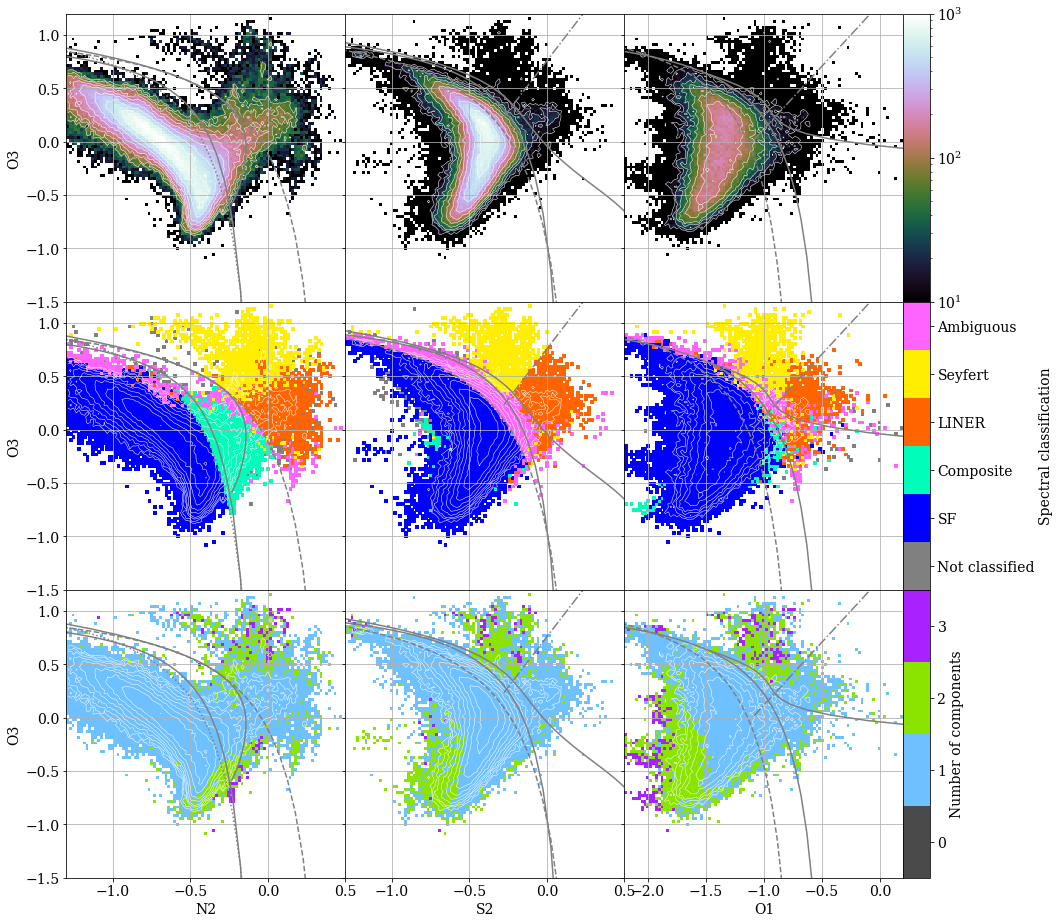

In [26]:
col_z_list = ["count", "BPT (numeric) (total)", "Number of components"]
col_y = "log O3 (total)"
fig, axs, caxs = plot_empty_BPT_diagram(colorbar=True, nrows=3, include_Law2021=True)
for rr, col_z in enumerate(col_z_list):

    # Plot 2D histograms of the subset
    plot2dhistcontours(df, col_x="log N2 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, ax=axs[3 * rr + 0], nbins=100, contours=True, colors="white", plot_colorbar=False)
    plot2dhistcontours(df, col_x="log S2 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, ax=axs[3 * rr + 1], nbins=100, contours=True, colors="white", plot_colorbar=False)
    plot2dhistcontours(df, col_x="log O1 (total)", col_y=col_y, col_z=col_z, log_z=True if col_z == "count" else False, ax=axs[3 * rr + 2], nbins=100, contours=True, colors="white", cax=caxs[rr], plot_colorbar=True)
    
    # Decorations
    [ax.set_ylabel("") for ax in axs[3 * rr + 1:3 * rr + 3]]
    [ax.set_yticklabels([]) for ax in axs[3 * rr + 1:3 * rr + 3]]
    if col_z == "count":
        [ax.get_children()[0].set_clim([10, 1e3]) for ax in axs[3 * rr + 1:3 * rr + 3]]

# Grid on
[ax.grid() for ax in axs]

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"BPT_quantities_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")


In [29]:
    fig.savefig(os.path.join(fig_path, f"BPT_quantities_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")


# WHAV and WHAV* diagrams

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


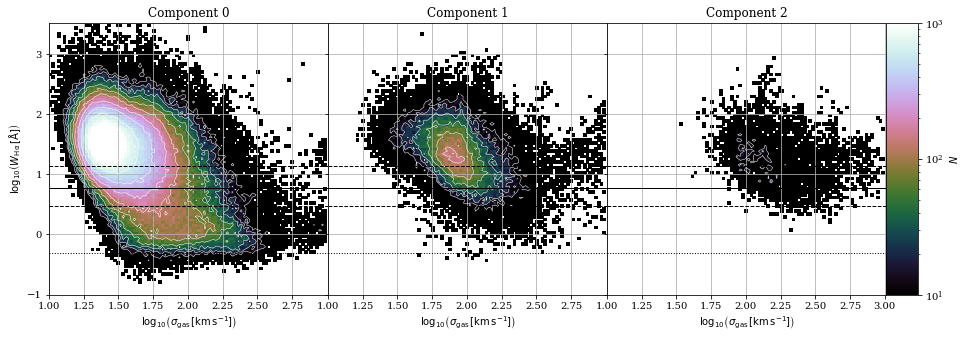

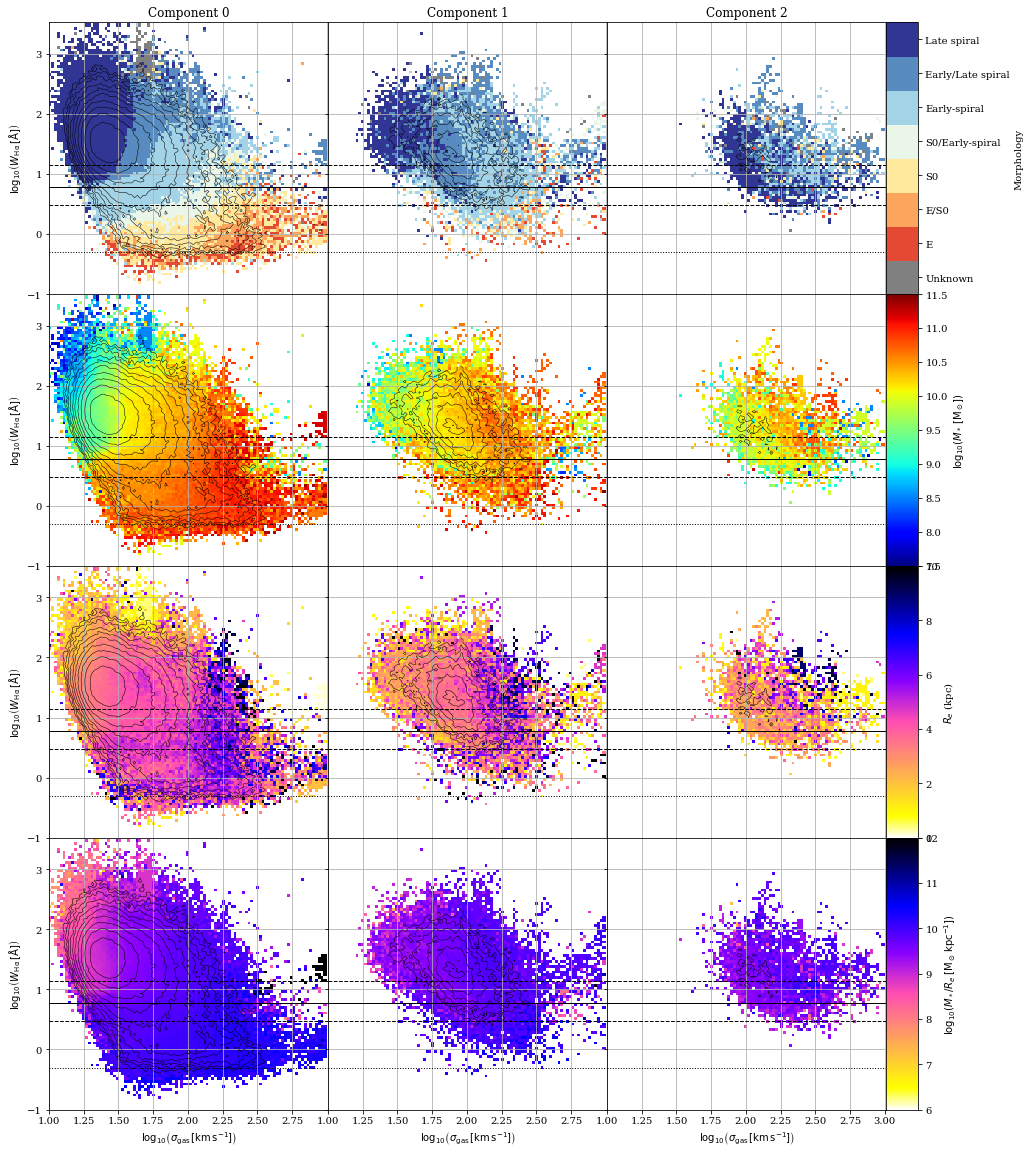

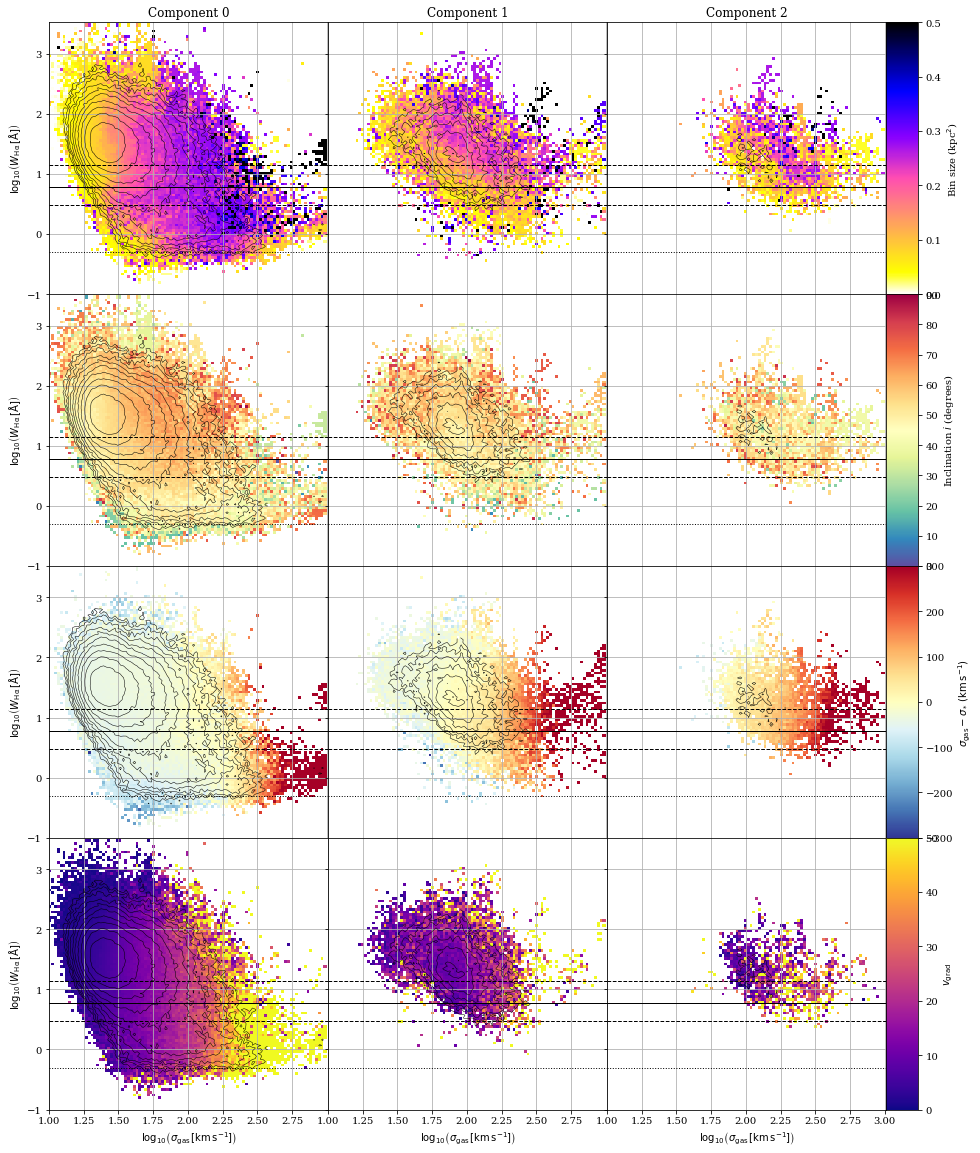

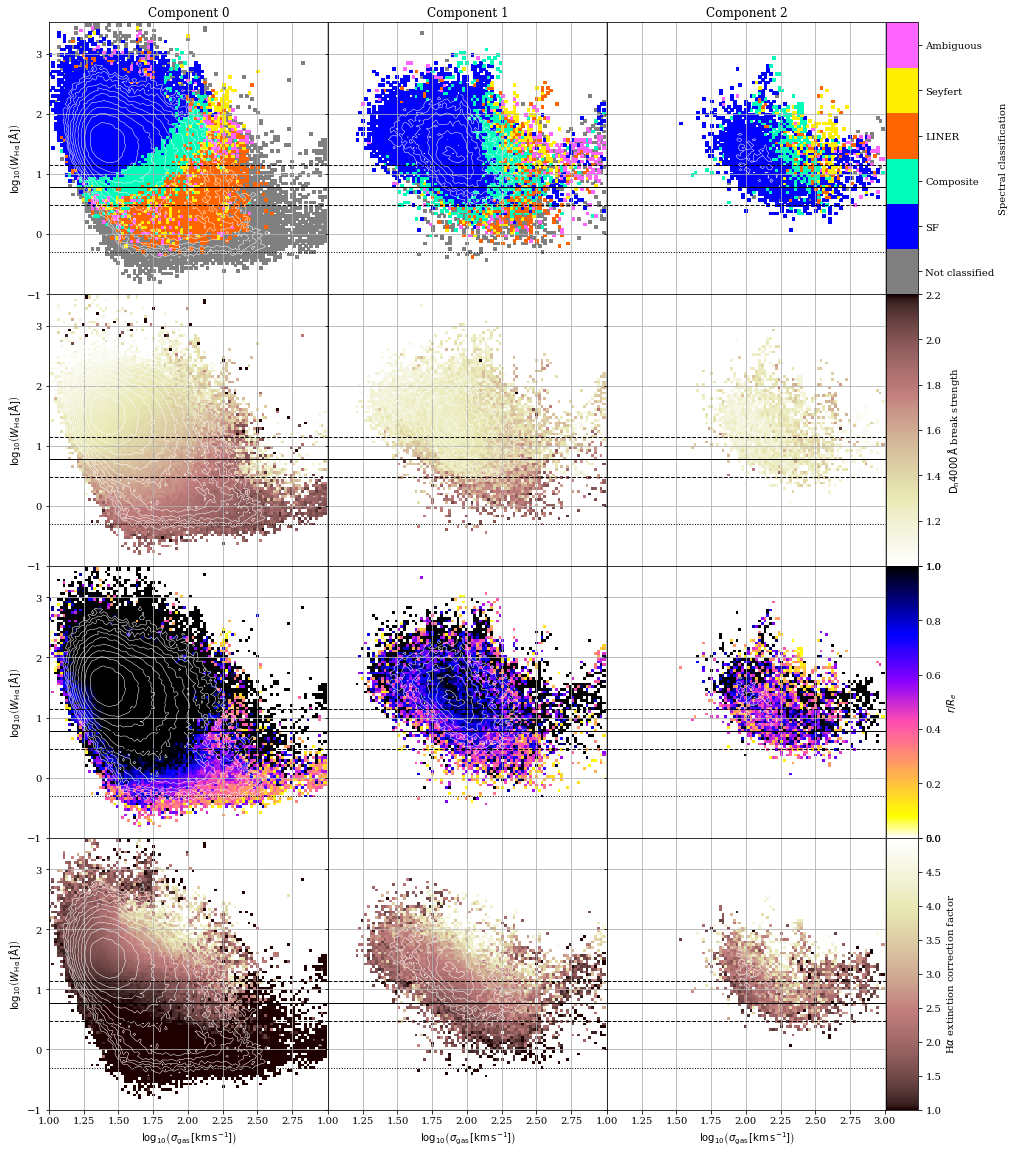

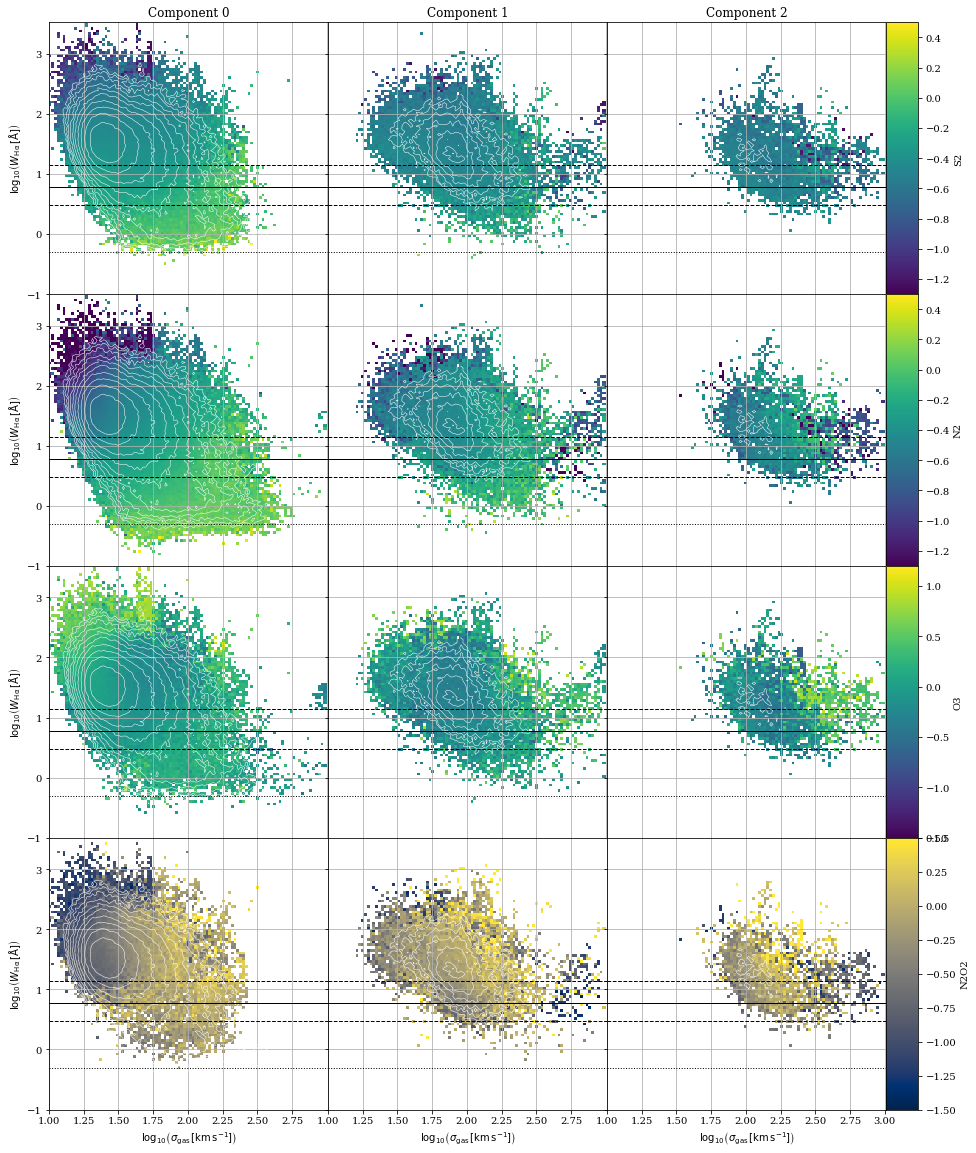

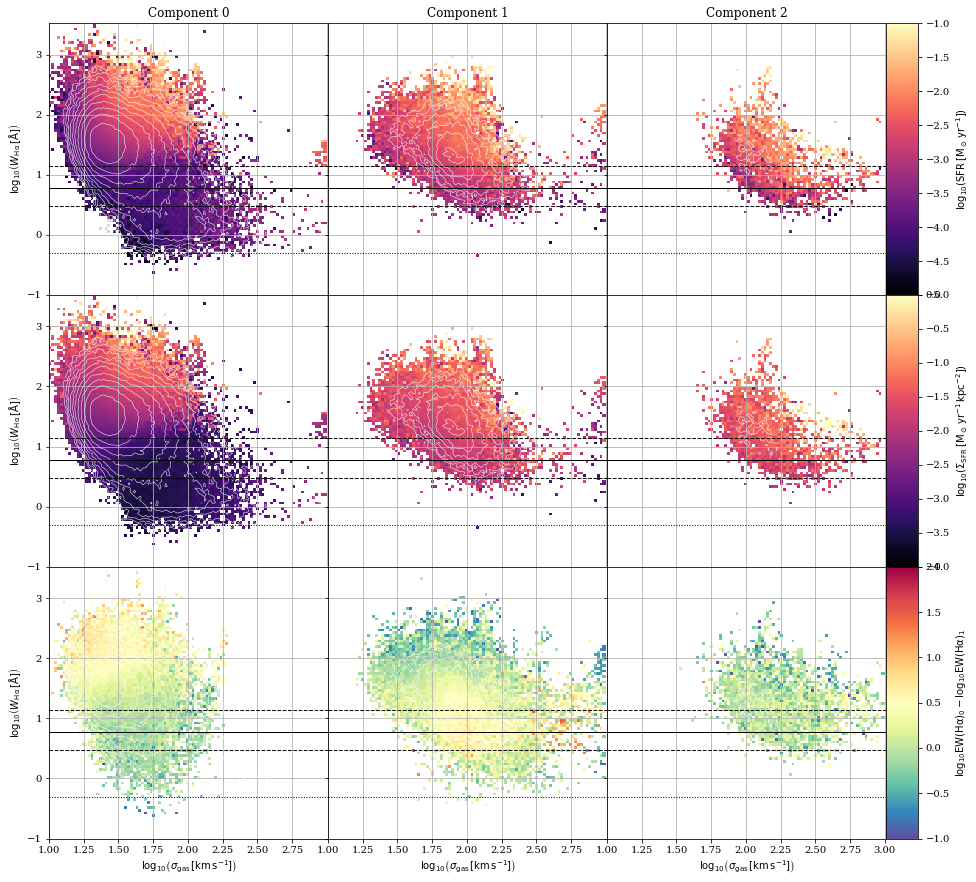

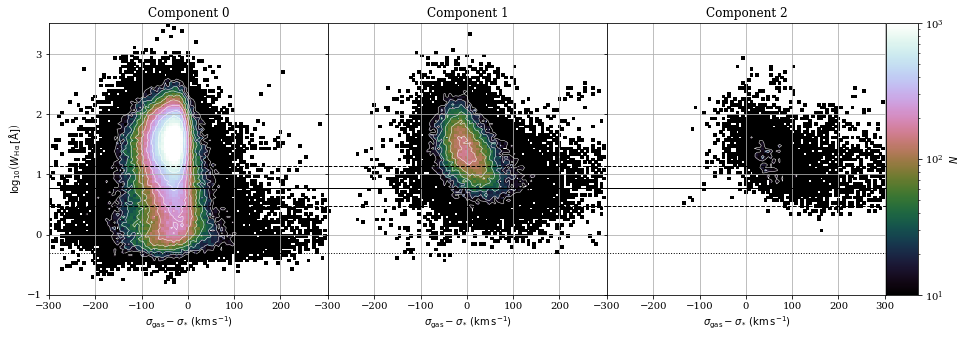

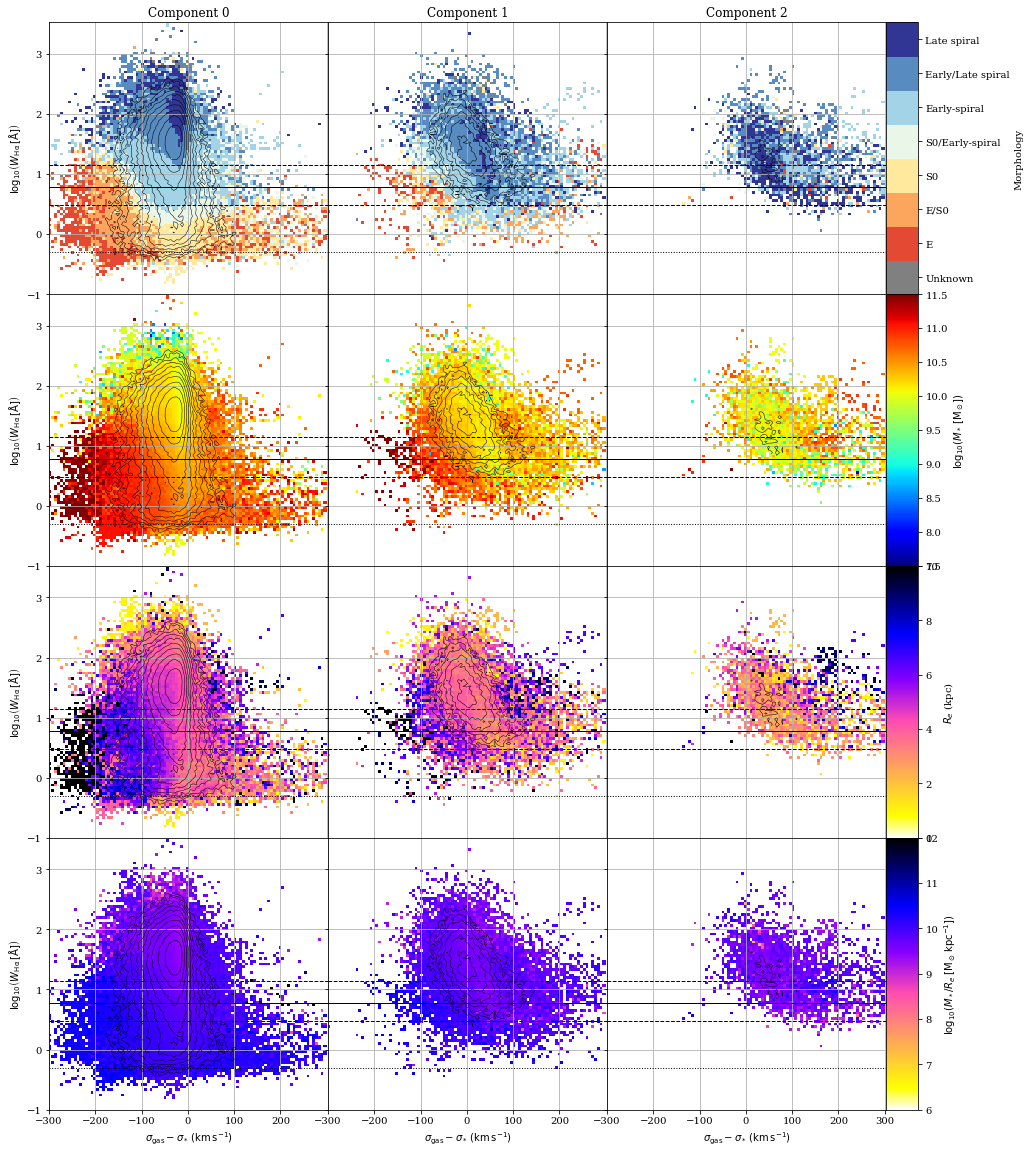

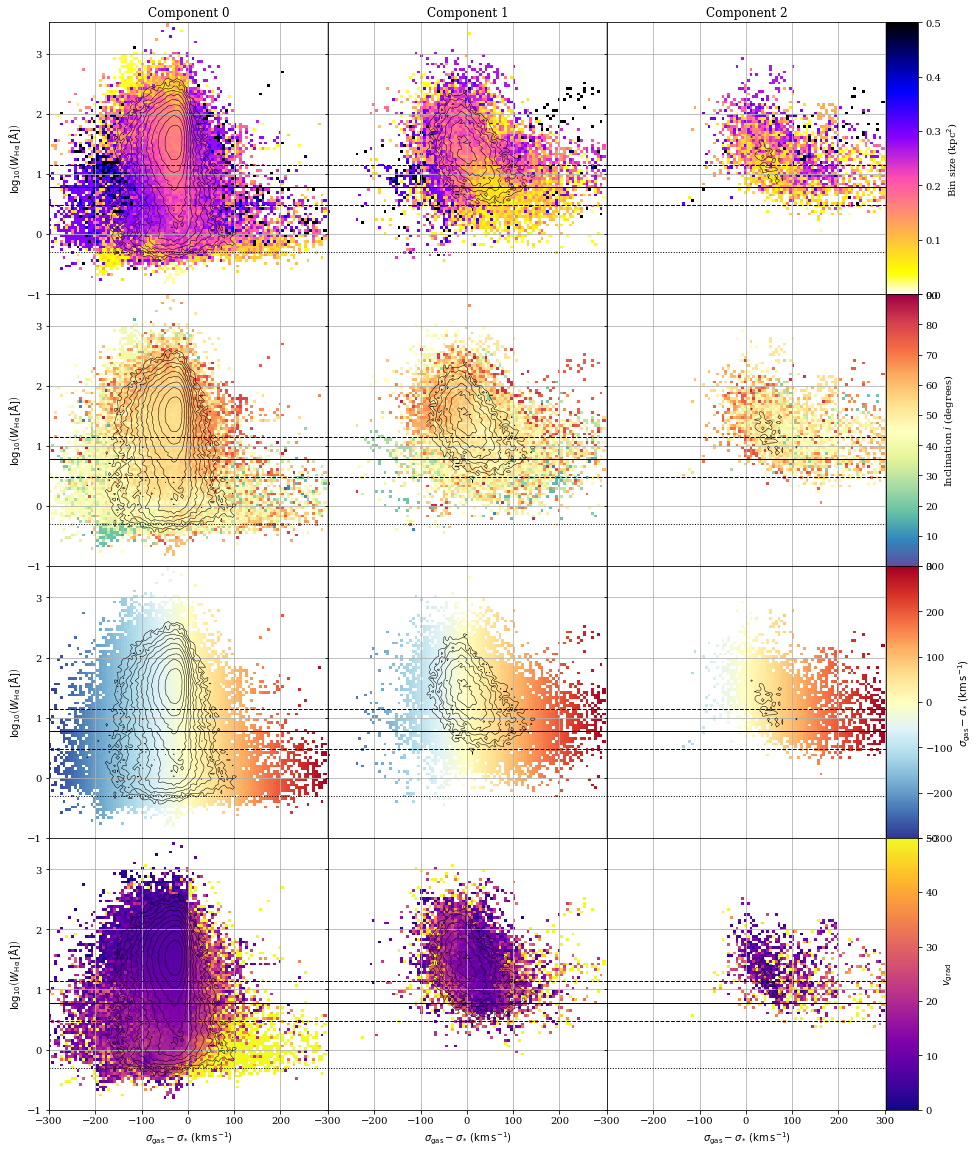

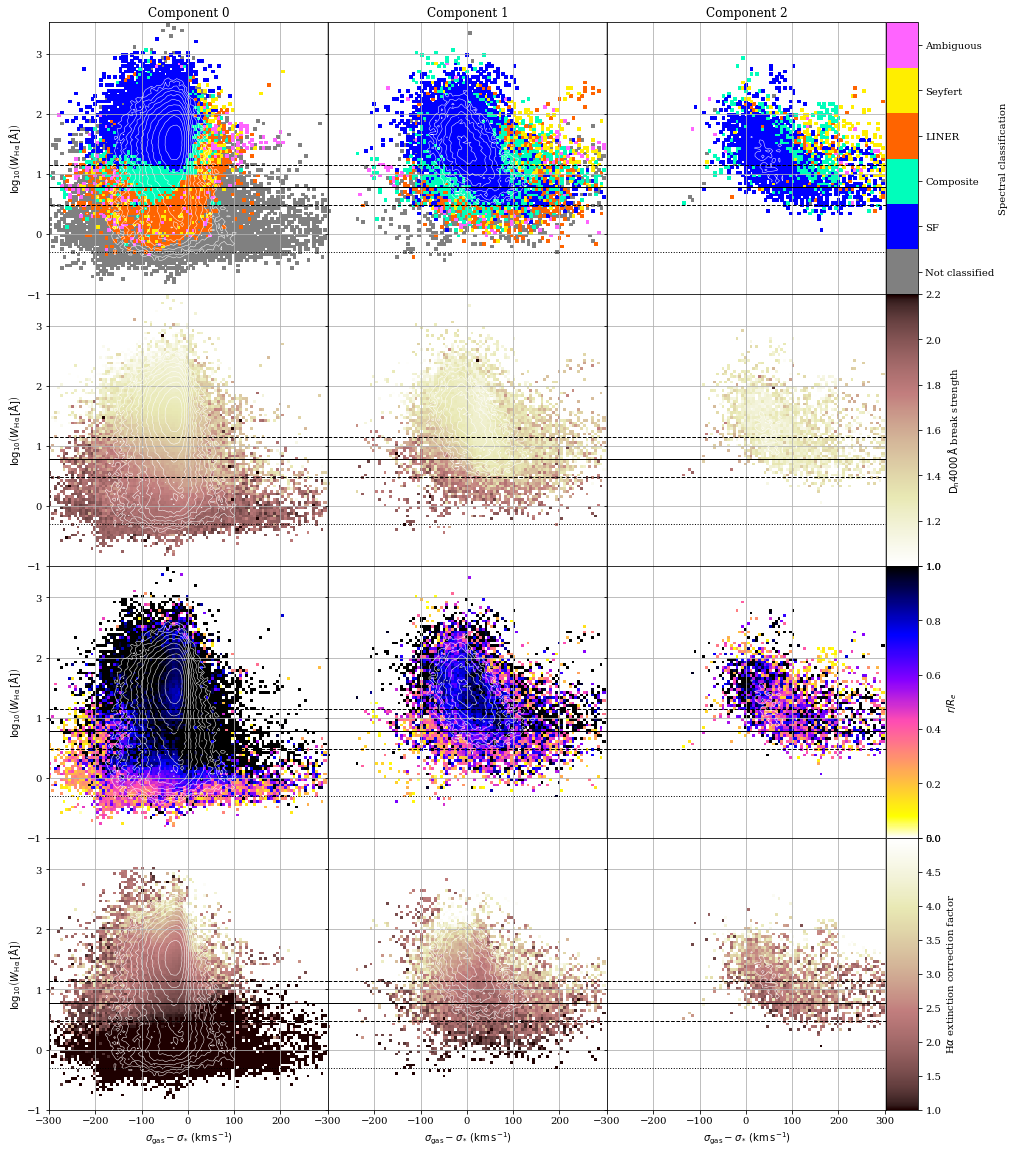

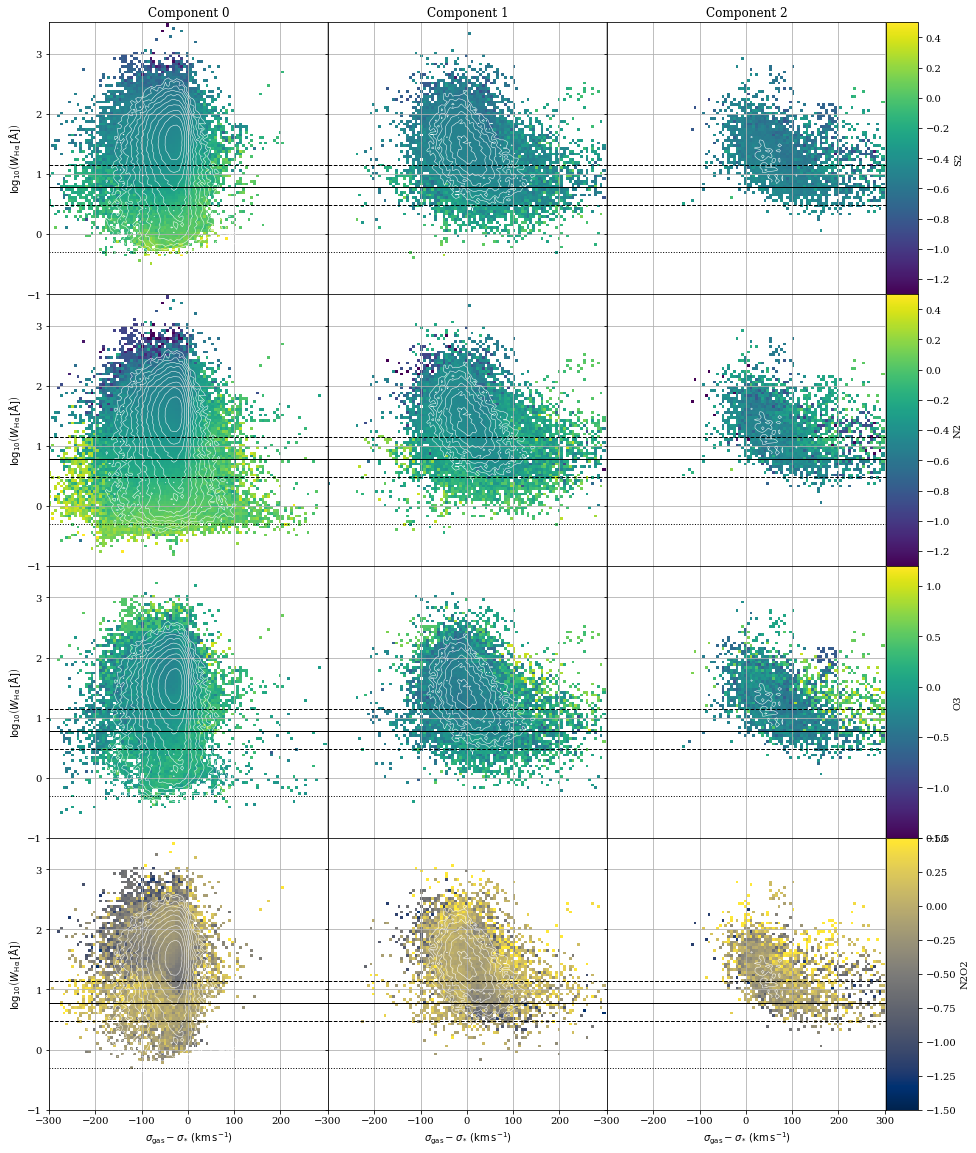

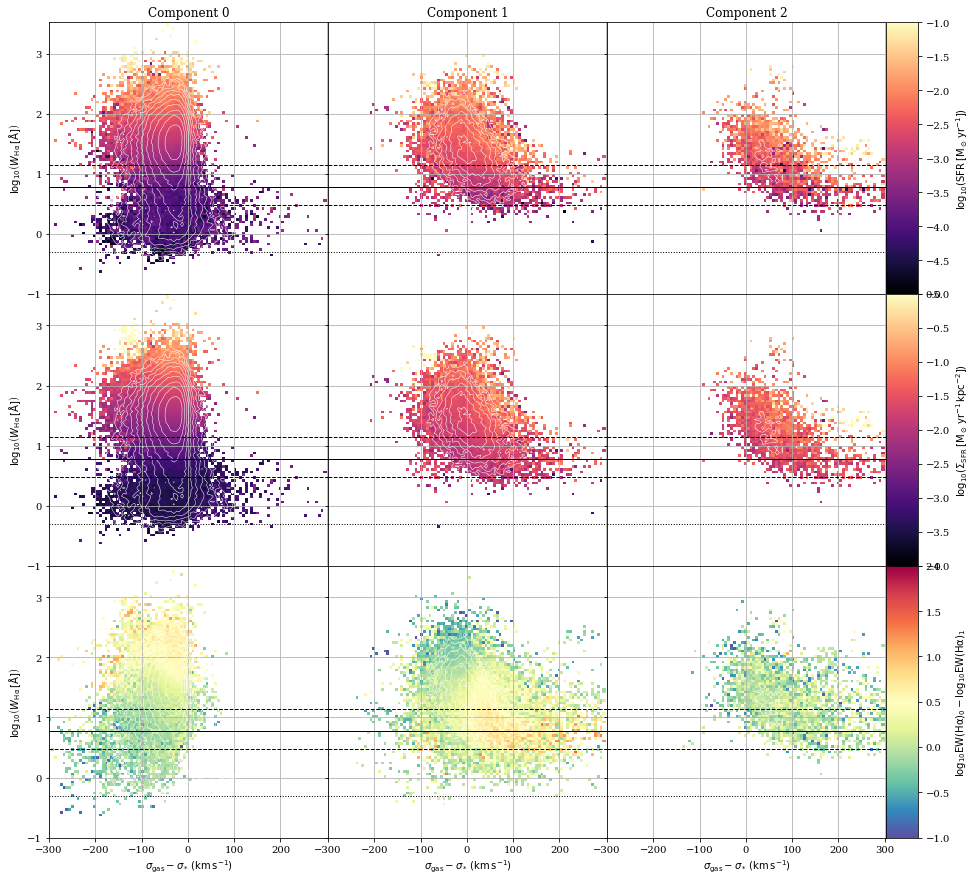

In [7]:
for col_x in ["log sigma_gas", "sigma_gas - sigma_*"]:
    if col_x == "log sigma_gas":
        fig_fname_prefix = "WHAV"
    elif col_x == "sigma_gas - sigma_*":
        fig_fname_prefix = "WHAV_star"
    elif col_x == "sigma_gas/sigma_*":
        fig_fname_prefix = "WHAV_star_frac"
    col_y = "log HALPHA EW"
    nbins = 100

    ###############################################################################
    # WHAV diagram, each component shown separately (counts)
    ###############################################################################
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                           col_y=f"{col_y} (component {ii})",
                           col_z="count", log_z=True,
                           alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                           cmap="cubehelix", linewidths=0.5,
                           contours=True, hist=True, colors="white",
                           plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_title(component_labels[ii])
        # Adjust the axis scaling
        axs[ii].get_children()[0].set_clim(10, 1e3)
    cax.set_ylabel(r"$N$")

    # Hide the last x-axis tick so they don't overlap
    for ax in axs[:-1]:
        ax.set_xticks(ax.get_xticks()[:-2])

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual.pdf"))

    ###############################################################################
    # WHAV diagram (hist) - global properties
    ###############################################################################
    col_z_list = ["Morphology (numeric)", "mstar", "R_e (kpc)", "log(M/R_e)"]

    fig, axs_all = plt.subplots(nrows=len(col_z_list), ncols=3, figsize=(5 * 3, 5 * len(col_z_list)))
    fig.subplots_adjust(wspace=0, hspace=0)

    for rr, (axs, col_z) in enumerate(zip(axs_all, col_z_list)): 
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

        # recom components
        for ii in range(3):
            plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                                  col_y=f"{col_y} (component {ii})",
                                  col_z=col_z,
                                  alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                                  linewidths=0.5,
                                  contours=True, hist=True, colors="black",
                                  plot_colorbar=True if ii == 3 - 1 else False)
            # Decorations
            axs[ii].grid()
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
            axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
            axs[ii].set_title(component_labels[ii]) if rr == 0 else None

        if rr == len(col_z_list) - 1:
            for ax in axs[:-1]:
                ax.set_xticks(ax.get_xticks()[:-2])

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_global_properties.pdf"), format="pdf", bbox_inches="tight")

    ###############################################################################
    # WHAV diagram (hist) - systematic (observational) properties
    ###############################################################################
    col_z_list = ["Bin size (square kpc)", "Inclination i (degrees)", "sigma_gas - sigma_*", "v_grad"]

    fig, axs_all = plt.subplots(nrows=len(col_z_list), ncols=3, figsize=(5 * 3, 5 * len(col_z_list)))
    fig.subplots_adjust(wspace=0, hspace=0)

    for rr, (axs, col_z) in enumerate(zip(axs_all, col_z_list)): 
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

        # recom components
        for ii in range(3):
            plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                                  col_y=f"{col_y} (component {ii})",
                                  col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})" in df else col_z,
                                  alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                                  linewidths=0.5,
                                  contours=True, hist=True, colors="black",
                                  plot_colorbar=True if ii == 3 - 1 else False)
            # Decorations
            axs[ii].grid()
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
            axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
            axs[ii].set_title(component_labels[ii]) if rr == 0 else None

        if rr == len(col_z_list) - 1:
            for ax in axs[:-1]:
                ax.set_xticks(ax.get_xticks()[:-2])

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_systematics.pdf"), format="pdf", bbox_inches="tight")


    ###############################################################################
    # WHAV diagram (hist) - local properties
    ###############################################################################
    col_z_list = ["BPT (numeric) (total)", "D4000", "r/R_e", "HALPHA extinction correction"]

    fig, axs_all = plt.subplots(nrows=len(col_z_list), ncols=3, figsize=(5 * 3, 5 * len(col_z_list)))
    fig.subplots_adjust(wspace=0, hspace=0)

    for rr, (axs, col_z) in enumerate(zip(axs_all, col_z_list)): 
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

        # recom components
        for ii in range(3):
            plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                                  col_y=f"{col_y} (component {ii})",
                                  col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})" in df else col_z,
                                  alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                                  linewidths=0.5,
                                  contours=True, hist=True, colors="white",
                                  plot_colorbar=True if ii == 3 - 1 else False)
            # Decorations
            axs[ii].grid()
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
            axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
            axs[ii].set_title(component_labels[ii]) if rr == 0 else None

        if rr == len(col_z_list) - 1:
            for ax in axs[:-1]:
                ax.set_xticks(ax.get_xticks()[:-2])
    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_local_properties.pdf"), format="pdf", bbox_inches="tight")

    ###############################################################################
    # WHAV diagram (hist) - line ratios
    ###############################################################################
    col_z_list = ["log S2 (total)", "log N2 (total)", "log O3 (total)", "N2O2 (total)"]

    fig, axs_all = plt.subplots(nrows=len(col_z_list), ncols=3, figsize=(5 * 3, 5 * len(col_z_list)))
    fig.subplots_adjust(wspace=0, hspace=0)

    for rr, (axs, col_z) in enumerate(zip(axs_all, col_z_list)): 
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

        # recom components
        for ii in range(3):
            plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                                  col_y=f"{col_y} (component {ii})",
                                  col_z=col_z,
                                  alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                                  linewidths=0.5,
                                  contours=True, hist=True, colors="white",
                                  plot_colorbar=True if ii == 3 - 1 else False)
            # Decorations
            axs[ii].grid()
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
            axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
            axs[ii].set_title(component_labels[ii]) if rr == 0 else None

        if rr == len(col_z_list) - 1:
            for ax in axs[:-1]:
                ax.set_xticks(ax.get_xticks()[:-2])

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_line_ratios.pdf"), format="pdf", bbox_inches="tight")

    ###############################################################################
    # WHAV diagram (hist) - SFR
    ###############################################################################
    col_z_list = ["log SFR", "log SFR surface density", "Delta HALPHA EW (0/1)"]

    fig, axs_all = plt.subplots(nrows=len(col_z_list), ncols=3, figsize=(5 * 3, 5 * len(col_z_list)))
    fig.subplots_adjust(wspace=0, hspace=0)

    for rr, (axs, col_z) in enumerate(zip(axs_all, col_z_list)): 
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

        # recom components
        for ii in range(3):
            plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                                  col_y=f"{col_y} (component {ii})",
                                  col_z=col_z,
                                  alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                                  linewidths=0.5,
                                  contours=True, hist=True, colors="white",
                                  plot_colorbar=True if ii == 3 - 1 else False)
            # Decorations
            axs[ii].grid()
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
            axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
            axs[ii].set_title(component_labels[ii]) if rr == 0 else None

        if rr == len(col_z_list) - 1:
            for ax in axs[:-1]:
                ax.set_xticks(ax.get_xticks()[:-2])
    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_SFR.pdf"), format="pdf", bbox_inches="tight")


### WHAV and WHAV* diagrams for 1, 2 and 3-component spaxels

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in l

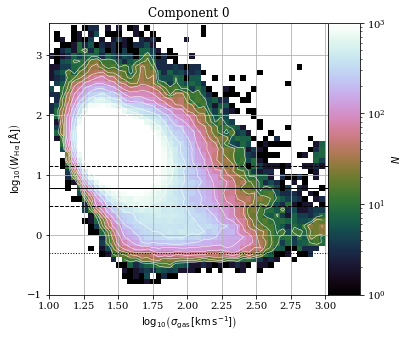

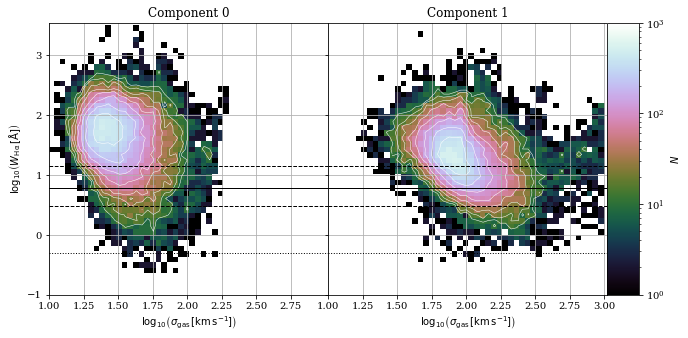

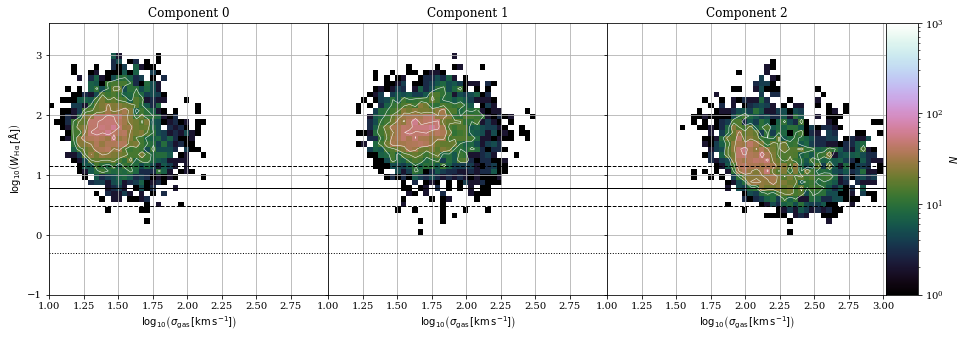

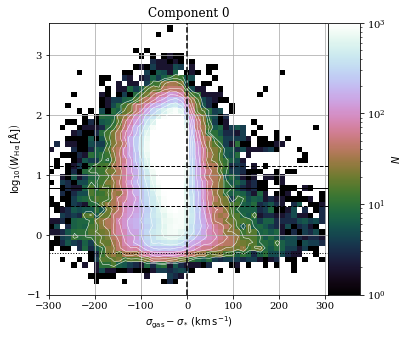

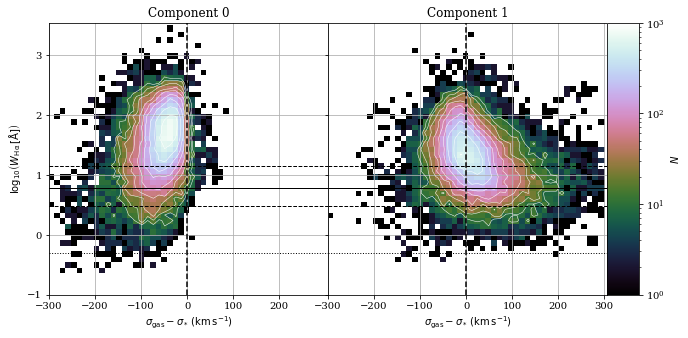

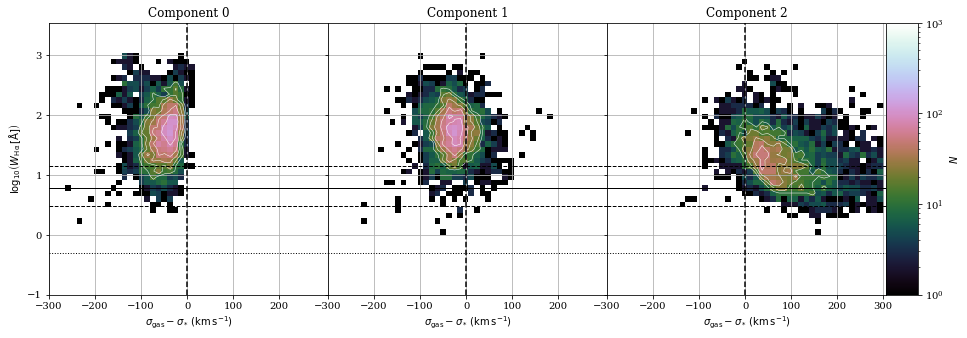

In [8]:
###############################################################################
# WHAV diagram (counts), but each component shown separately
# 3 components
###############################################################################
col_y = "log HALPHA EW"
for col_x in ["log sigma_gas", "sigma_gas - sigma_*"]:
    for nn, df_subset in enumerate([df_1only, df_2only, df_3only]):
        fig, axs = plt.subplots(nrows=1, ncols=nn + 1, figsize=(5 * (nn + 1), 5))
        axs = [axs] if nn == 0 else axs
        fig.subplots_adjust(wspace=0)
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.09 / (nn + 1), bbox.height])

        # recom components
        for ii in range(nn + 1):
            plot2dhistcontours(df_subset, col_x=f"{col_x} (component {ii})",
                               col_y=f"{col_y} (component {ii})",
                               col_z="count", log_z=True,
                               alpha=1.0, ax=axs[ii], cax=cax, nbins=50,
                               linewidths=0.5,
                               contours=True, hist=True, colors="white",
                               plot_colorbar=True if ii == nn else False)
            # Decorations
            axs[ii].grid()
            axs[ii].axvline(0, linestyle="--", color="k") if col_x == "sigma_gas - sigma_*" else None
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_title(f"Component {ii}")
            # Adjust the axis scaling
            axs[ii].get_children()[0].set_clim(1, 1e3)
        cax.set_ylabel(r"$N$")
            
        for ax in axs[:-1]:
            ax.set_xticks(ax.get_xticks()[:-2])

        # Save
        if savefigs:
            fig.savefig(os.path.join(fig_path, f"WHAV_{nn + 1}_component{'s' if nn > 0 else ''}_{bin_type}_{ncomponents}_individual.pdf"))


### WHAV* diagrams, each BPT classification shown separately

/home/u5708159/python/Modules/spaxelsleuth/plotting/plotgalaxies.py:177: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


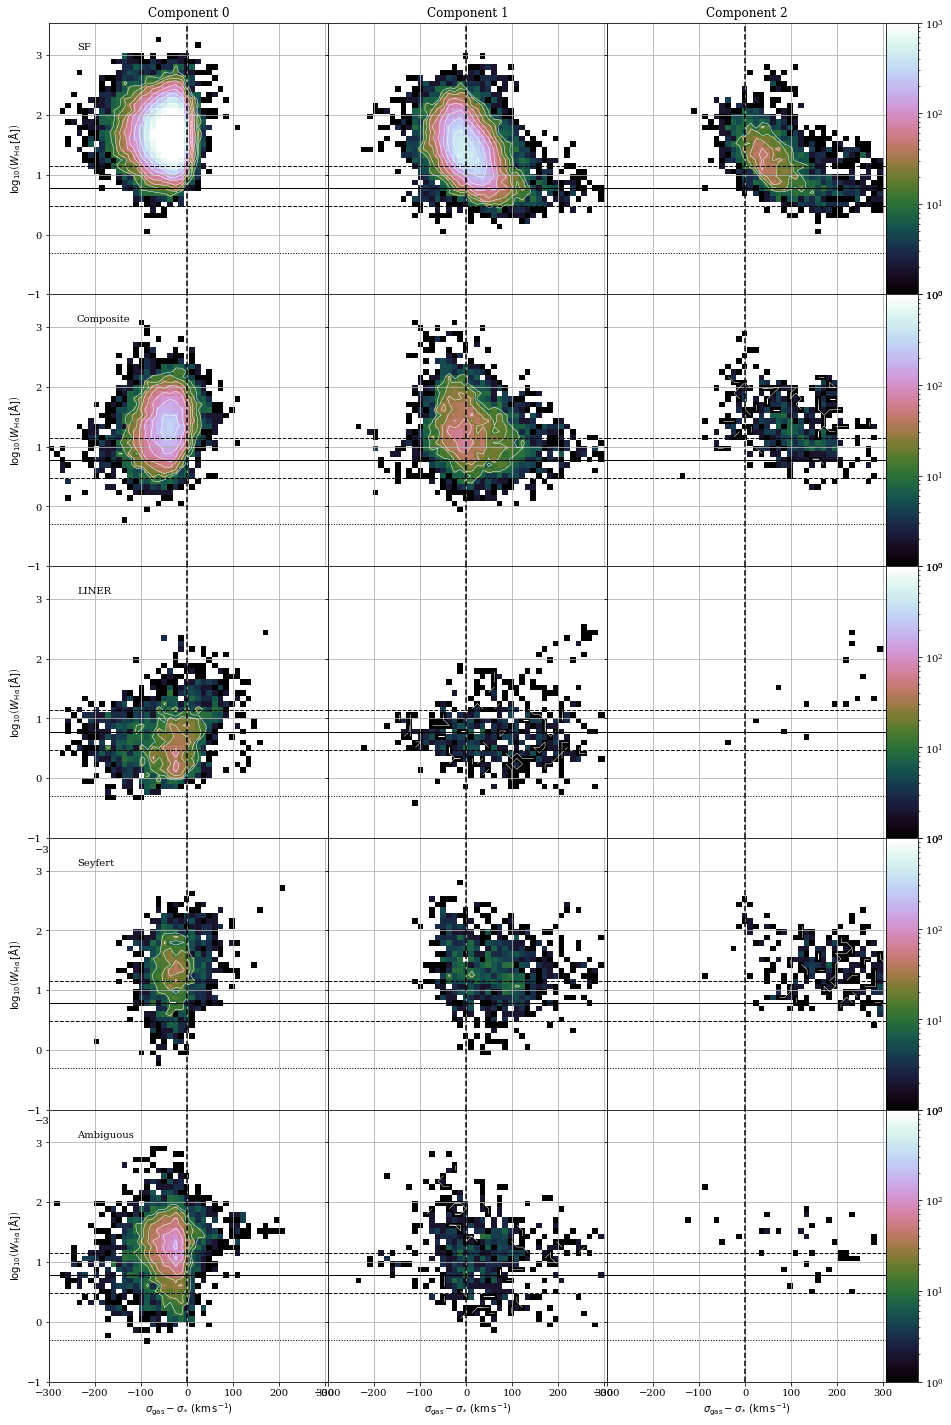

In [9]:
    ###############################################################################
    # WHAV diagram (hist) - BPT classifications
    ###############################################################################
    col_z = "count"
    col_x = "sigma_gas - sigma_*"
    
    fig, axs_all = plt.subplots(nrows=len(bpt_labels[1:]), ncols=3, figsize=(5 * 3, 5 * len(bpt_labels[1:])))
    fig.subplots_adjust(wspace=0, hspace=0)

    for rr, (axs, bpt) in enumerate(zip(axs_all, bpt_labels[1:])): 
        bbox = axs[-1].get_position()
        cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

        df_subset = df[df["BPT (total)"] == bpt]
        # recom components
        for ii in range(3):
            plot2dhistcontours(df_subset, col_x=f"{col_x} (component {ii})",
                                  col_y=f"{col_y} (component {ii})",
                                  col_z=col_z, log_z=True if col_z == "count" else False,
                                  alpha=1.0, ax=axs[ii], cax=cax, nbins=50,
                                  linewidths=0.5,
                                  contours=True, hist=True, colors="white",
                                  plot_colorbar=True if ii == 3 - 1 else False)
            # Decorations
            [axs[ii].get_children()[0].set_clim([1, 1e3]) if col_z == "count" else None]
            axs[ii].grid()
            axs[ii].axvline(0, linestyle="--", color="k") if col_x == "sigma_gas - sigma_*" else None
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_xlabel("") if rr < len(col_z_list) - 1 else None
            axs[ii].set_xticklabels([]) if rr < len(col_z_list) - 1 else None
            axs[ii].set_title(component_labels[ii]) if rr == 0 else None
        axs[0].text(s=bpt, x=0.1, y=0.9, horizontalalignment="left", transform=axs[0].transAxes)

        if rr == len(col_z_list) - 1:
            for ax in axs[:-1]:
                ax.set_xticks(ax.get_xticks()[:-2])

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"{fig_fname_prefix}_{bin_type}_{ncomponents}_individual_BPT.pdf"), format="pdf", bbox_inches="tight")


# Bar plots

**Fig. 2**: bar plot showing % of spaxels w/ 1, 2 or 3 components, broken down by spectral classification

**Fig. 3**: bar plot showing % of spaxels w/ 1, 2 or 3 components, broken down by host galaxy morphology

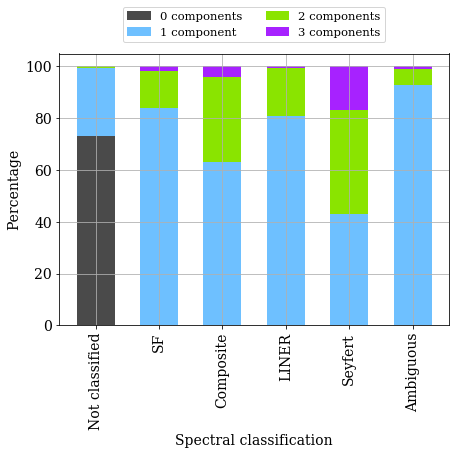

In [24]:
###############################################################################
# Stacked bar chart: # of fitted components by spectral classification
###############################################################################
counts_0 = []
counts_1 = []
counts_2 = []
counts_3 = []
for bpt in bpt_labels:
    cond = df["BPT (total)"] == bpt
    cond_0 = cond & (df["Number of components"] == 0)
    cond_1 = cond & (df["Number of components"] == 1)
    cond_2 = cond & (df["Number of components"] == 2)
    cond_3 = cond & (df["Number of components"] == 3)
    counts_0.append(df[cond_0].shape[0] / df[cond].shape[0] * 100)
    counts_1.append(df[cond_1].shape[0] / df[cond].shape[0] * 100)
    counts_2.append(df[cond_2].shape[0] / df[cond].shape[0] * 100)
    counts_3.append(df[cond_3].shape[0] / df[cond].shape[0] * 100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
ax.bar(bpt_labels, counts_0, width=0.6, label=ncomponents_labels[0] + " components", color=ncomponents_colours[0])
ax.bar(bpt_labels, counts_1, width=0.6, bottom=counts_0, label=ncomponents_labels[1] + " component", color=ncomponents_colours[1])
ax.bar(bpt_labels, counts_2, width=0.6, bottom=np.array(counts_0) + np.array(counts_1), label=ncomponents_labels[2] + " components", color=ncomponents_colours[2])
ax.bar(bpt_labels, counts_3, width=0.6, bottom=np.array(counts_0) + np.array(counts_1) + np.array(counts_2), label=ncomponents_labels[3] + " components", color=ncomponents_colours[3])
ax.grid()
ax.set_ylim([0, 105])
ax.set_ylabel("Percentage")
ax.set_xlabel("Spectral classification")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize="small")
plt.xticks(rotation=90)

if savefigs:
    fig.savefig(os.path.join(fig_path, f"bar_ncomponents_by_spectral_class_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")

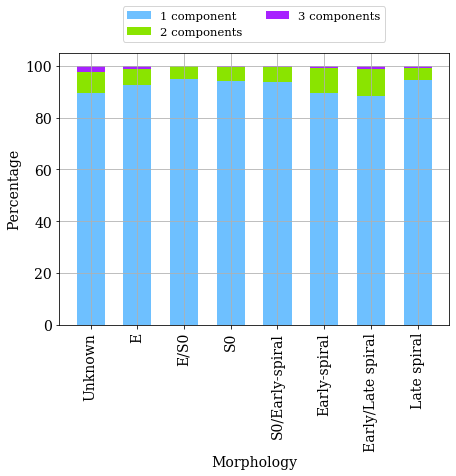

In [25]:
###############################################################################
# Stacked bar chart: # of fitted components by morphology
###############################################################################
# counts_0 = []
counts_1 = []
counts_2 = []
counts_3 = []
for morph in morph_labels:
    cond = df["Morphology"] == morph
    cond &= df["Number of components"] > 0
#     cond_0 = cond & (df["Number of components"] == 0)
    cond_1 = cond & (df["Number of components"] == 1)
    cond_2 = cond & (df["Number of components"] == 2)
    cond_3 = cond & (df["Number of components"] == 3)
#     counts_0.append(df[cond_0].shape[0] / df[cond].shape[0] * 100)
    counts_1.append(df[cond_1].shape[0] / df[cond].shape[0] * 100)
    counts_2.append(df[cond_2].shape[0] / df[cond].shape[0] * 100)
    counts_3.append(df[cond_3].shape[0] / df[cond].shape[0] * 100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
# ax.bar(morph_labels, counts_0, width=0.6, label=ncomponents_labels[0] + " components", color=ncomponents_colours[0])
ax.bar(morph_labels, counts_1, width=0.6, label=ncomponents_labels[1] + " component", color=ncomponents_colours[1])
ax.bar(morph_labels, counts_2, width=0.6, bottom=np.array(counts_1), label=ncomponents_labels[2] + " components", color=ncomponents_colours[2])
ax.bar(morph_labels, counts_3, width=0.6, bottom=np.array(counts_1) + np.array(counts_2), label=ncomponents_labels[3] + " components", color=ncomponents_colours[3])
ax.grid()
ax.set_ylim([0, 105])
ax.set_ylabel("Percentage")
ax.set_xlabel("Morphology")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize="small")
plt.xticks(rotation=90)

if savefigs:
    fig.savefig(os.path.join(fig_path, f"bar_ncomponents_by_morphology_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")

# Histograms showing the distribution in H$\alpha$ EW, $\sigma_{\rm gas}$, $\sigma_{\rm gas} - \sigma_*$ and $\sigma_{\rm gas}/\sigma_*$

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


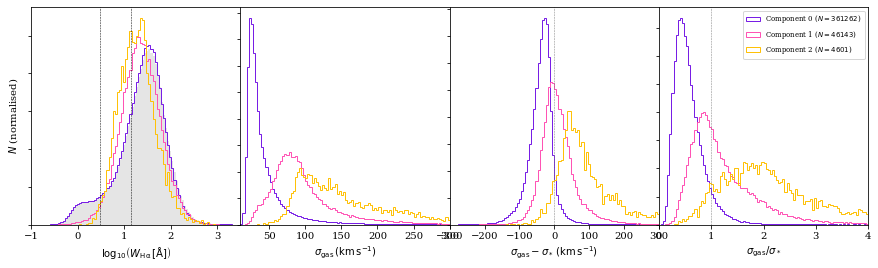

In [12]:
###############################################################################
# Histograms showing the distribution in the above quantities for spaxels
# with 1, 2 or 3 fitted copmonents
###############################################################################
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
fig.subplots_adjust(wspace=0)

for ax, col_x in zip(axs, ["log HALPHA EW", "sigma_gas", "sigma_gas - sigma_*", "sigma_gas/sigma_*"]):
    
    # Show the distribution of the total EW in each spaxel
    if col_x == "log HALPHA EW":
        ax.hist(df[f"{col_x} (total)"], histtype="bar",
                bins=100, range=((vmin_fn(col_x), vmax_fn(col_x))), color="grey",
                density=True, alpha=0.2, label=f"Total " + r"($N = %d$)" % df[f"{col_x} (total)"].count())
        ax.axvline(np.log10(3), linestyle="--", color="k", linewidth=0.5)
        ax.axvline(np.log10(14), linestyle="--", color="k", linewidth=0.5)
   
   # Show the distribution of each kinematic component separately
    for ii in range(3):
        ax.hist(df[f"{col_x} (component {ii})"], histtype="step",
                bins=100, range=((vmin_fn(col_x), vmax_fn(col_x))), color=component_colours[ii],
                density=True, label=component_labels[ii] + r" ($N = %d$)" % df[f"{col_x} (component {ii})"].count())
    
    # Decorations
    ax.set_xlabel(label_fn(col_x))
    ax.set_ylabel(r"$N$ (normalised)") if ax == axs[0] else None
    ax.set_yticklabels([])
    ax.legend(loc="upper right", fontsize="x-small") if ax == axs[-1] else None
    ax.autoscale(enable=True, axis="x", tight=True)
    ax.axvline(0, color="grey", linestyle="--", linewidth=0.5) if col_x == "sigma_gas - sigma_*" else None
    ax.axvline(1, color="grey", linestyle="--", linewidth=0.5) if col_x == "sigma_gas/sigma_*" else None

# [ax.set_xticklabels(ax.get_xticklabels()[:-1]) for ax in axs[1:-1]]
    
# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_Halpha_EW_and_kinematics_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")


# Is it DIG?

### Histogram showing $\sigma_{\rm gas, 1} - \sigma_{\rm gas, 0}$ for components 1 and 3

In [13]:
###############################################################################
# Make a copy of the DataFrame where v_grad cut has been made
###############################################################################
df_cut = df_SF.copy()
df_nocut = df_SF.copy()

for ii in range(3 if ncomponents == "recom" else 1):
    cond_bad_gaskin = df_cut[f"sigma_gas (component {ii})"] < 2 * df_cut[f"v_grad (component {ii})"]
    df_cut.loc[cond_bad_gaskin] = np.nan

# Also, NaN out rows where EVERY v_grad component is NaN.
cond_NaN_vgrad = None
for ii in range(3 if ncomponents == "recom" else 1):
    if cond_NaN_vgrad is None:
        cond_NaN_vgrad = np.isnan(df_cut[f"v_grad (component {ii})"])
    else:
        cond_NaN_vgrad &= np.isnan(df_cut[f"v_grad (component {ii})"])
df_cut.loc[cond_NaN_vgrad] = np.nan

###############################################################################
# Make v_grad and inclination cuts to minimise the impact of beam smearing
###############################################################################
# Inclination cut
df_cut = df_cut[df_cut["Inclination i (degrees)"] < 30]
df_nocut = df_nocut[df_nocut["Inclination i (degrees)"] < 30]

df_cut_2only = df_cut.copy()
df_cut_3only = df_cut.copy()
df_cut_2only = df_cut_2only[df_cut_2only["Number of components"] == 2]
df_cut_3only = df_cut_3only[df_cut_3only["Number of components"] == 3]

df_nocut_2only = df_nocut.copy()
df_nocut_3only = df_nocut.copy()
df_nocut_2only = df_nocut_2only[df_nocut_2only["Number of components"] == 2]
df_nocut_3only = df_nocut_3only[df_nocut_3only["Number of components"] == 3]

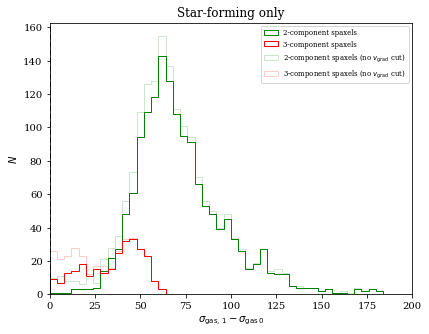

In [14]:
###############################################################################
# Red & green histogram: Delta sigma_gs
###############################################################################
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
fig.subplots_adjust(wspace=0.0)

col_x = "delta sigma_gas (1/0)"
ax.hist(df_cut_2only[col_x], range=(0, 200), density=False, bins=50, alpha=1.0, color="green", histtype="step", label="2-component spaxels")
ax.hist(df_cut_3only[col_x], range=(0, 200), density=False, bins=50, alpha=1.0, color="red", histtype="step", label="3-component spaxels")
ax.hist(df_nocut_2only[col_x], range=(0, 200), density=False, bins=50, alpha=0.2, color="green", histtype="step", label=r"2-component spaxels (no $v_{\rm grad}$ cut)")
ax.hist(df_nocut_3only[col_x], range=(0, 200), density=False, bins=50, alpha=0.2, color="red", histtype="step", label=r"3-component spaxels (no $v_{\rm grad}$ cut)")
ax.set_xlabel(label_fn(col_x))

# Decorations
ax.set_title("Star-forming only")
ax.set_ylabel(r"$N$")   
ax.axvline(0, color="k", ls="--")
ax.legend(fontsize="x-small")
ax.set_xlim([0, 200])
ax.autoscale(enable=True, axis="x", tight=True)

if savefigs:
    fig.savefig(os.path.join(fig_path, f"delta_sigma_gas_hist_SF_only_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")

# What about shocks associated with star formation?

### Histograms showing distribution in H$\alpha$ EW, $\sigma_{\rm gas}$, SFR and SFR surface density

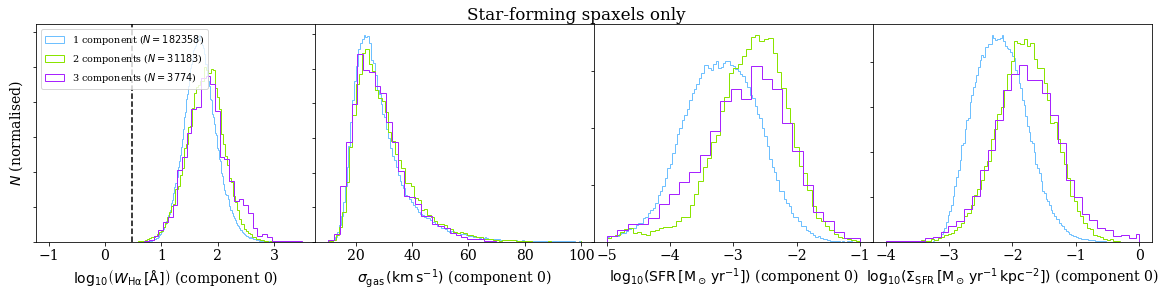

In [32]:
###############################################################################
# Histograms: sigma_gas (component 0), SFR (component 0), SFR surface density (component 0)
# for spaxels with 1, 2, 3 fitted components
###############################################################################
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
fig.subplots_adjust(wspace=0)

for cc, col_x in enumerate(["log HALPHA EW (component 0)", "sigma_gas (component 0)", "log SFR (component 0)", "log SFR surface density (component 0)"]):
    for ii in range(3):
        cond = df_SF["Number of components"] == ii + 1
        hist(df_SF.loc[cond, col_x], density=True, histtype="step",
             ax=axs[cc], range=(vmin_fn(col_x), 100 if col_x.startswith("sigma") else vmax_fn(col_x)),
             bins="scott",
             label=f"{ncomponents_labels[ii + 1]} component{'s' if ii + 1 > 1 else ''}" + r" ($N = %d$)" % (df_SF.loc[cond, col_x].shape[0]),
             color=ncomponents_colours[ii + 1])
    axs[cc].set_xlabel(label_fn(col_x) + " (component 0)")
    axs[cc].set_yticklabels([]) if ii > 0 else None
axs[0].axvline(np.log10(3), linestyle="--", color="k")
axs[0].legend(fontsize="x-small", loc="upper left")
axs[0].set_ylabel(r"$N$ (normalised)")
fig.suptitle("Star-forming spaxels only", y=0.94)

if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_1vs2vs3components_HaEW_and_sigma_and_SFR_SF_only_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")


# The effects of systematics: what systematic, local and global galaxy properties are correlated with the number of fitted components?
---
### Histograms showing H$\alpha$ S/N

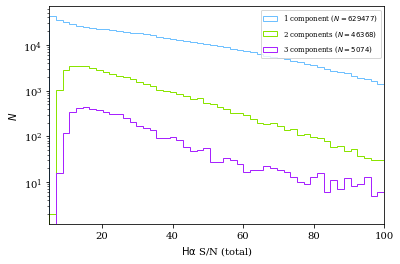

In [16]:
###############################################################################
# Blue, purple & green histogram: Total HALPHA S/N in spaxels divided into # 
# of components (log scale, not normalised)
###############################################################################
colors = ["dodgerblue", "forestgreen", "purple"]
labels = ["1 component fitted", "2 components fitted", "3 components fitted"]

fig, ax = plt.subplots(nrows=1, ncols=1)
# Show the distribution of each kinematic component separately
col_x = "HALPHA S/N (total)"
for nn, df_subset in enumerate([df_1only, df_2only, df_3only]):
    ax.hist(df_subset[f"{col_x}"], histtype="step",
            bins=50, range=(eline_SNR_min, 100), color=ncomponents_colours[nn + 1],
            density=False, label=f"{ncomponents_labels[nn + 1]} component{'s' if nn + 1 > 1 else ''}" + r" ($N = %d$)" % df_subset[f"{col_x}"].count())
ax.set_yscale("log")
ax.set_xlabel(label_fn(col_x) + " (total)")
ax.set_ylabel(r"$N$")
ax.autoscale(axis="x", enable=True, tight=True)
ax.legend(loc="upper right", fontsize="x-small")

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_HALPHA_SNR_1vs2vs3components_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")

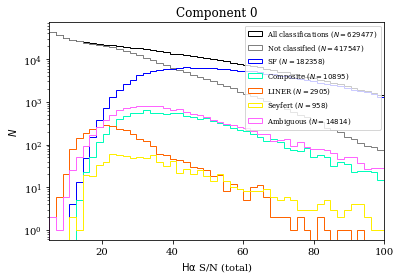

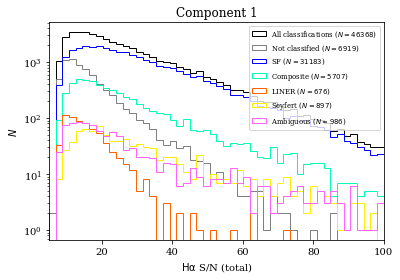

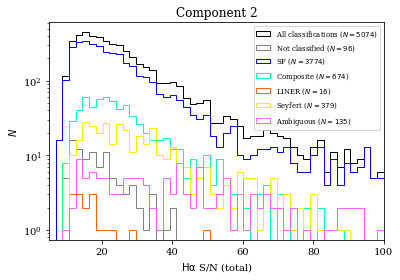

In [17]:
###############################################################################
# Histogram: HALPHA S/N in spaxels divided into # of components AND BPT 
# classification
###############################################################################

for nn, df_subset in enumerate([df_1only, df_2only, df_3only]):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    # Show the distribution of each kinematic component separately
    col_x = "HALPHA S/N (total)"
    ax.hist(df_subset[f"{col_x}"], histtype="step",
            bins=50, range=(eline_SNR_min, 100), color="black",
            density=False, label="All classifications" + r" ($N = %d$)" % df_subset[f"{col_x}"].count())

    for cc, bpt in enumerate(bpt_labels):
        ax.hist(df_subset[df_subset["BPT (total)"] == bpt][f"{col_x}"], histtype="step",
                bins=50, range=(eline_SNR_min, 100), color=bpt_colours[cc],
                density=False, label=bpt + r" ($N = %d$)" % df_subset[df_subset["BPT (total)"] == bpt][f"{col_x}"].count())
    ax.set_yscale("log")
    ax.set_xlabel(label_fn(col_x) + " (total)")
    ax.set_ylabel(r"$N$")
    ax.autoscale(axis="x", enable=True, tight=True)
    ax.legend(loc="upper right", fontsize="x-small")
    ax.set_title(f"Component {nn}")

    # Save
    if savefigs:
        fig.savefig(os.path.join(fig_path, f"hist_HALPHA_SNR_component{nn}_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")

### 2D histograms showing D4000Å break strength vs. H$\alpha$ S/N, coloured by counts and H$\alpha$ EW: what is the stellar age distribution in low-S/N spaxels?

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


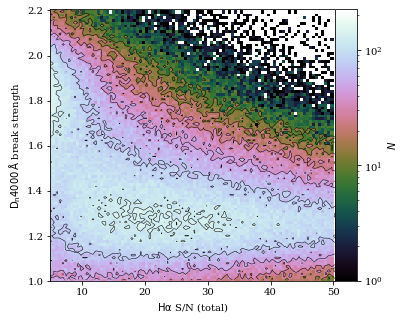

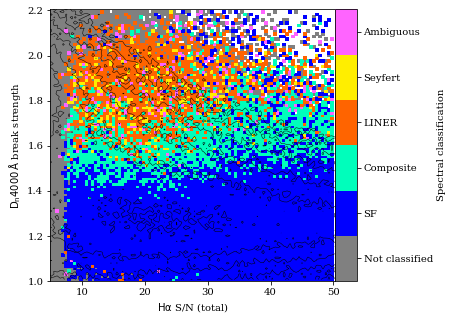

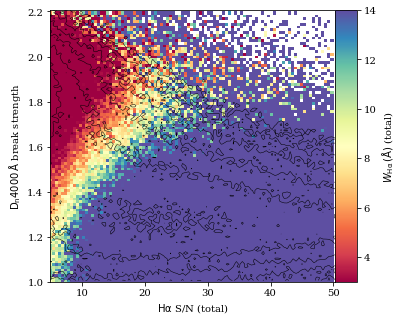

In [18]:
###############################################################################
# Investigate the low-S/N regime: what are their properties?
###############################################################################
# Plot: Halpha S/N (total) vs. D4000 break strength
fig = plot2dhistcontours(df, col_x="HALPHA S/N (total)", col_y="D4000", col_z="count", log_z=True, figsize=(6, 5))
fig.get_axes()[0].set_xlabel(r"$\rm H\alpha$ S/N (total)")
fig.get_axes()[0].set_xlim([eline_SNR_min, None])

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"HALPHA_SNR_vs_D4000_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")

# Plot: Halpha S/N (total) vs. D4000 break strength - coloured by median BPT classification
fig = plot2dhistcontours(df, col_x="HALPHA S/N (total)", col_y="D4000", col_z="BPT (numeric) (total)", figsize=(6, 5))
fig.get_axes()[0].set_xlabel(r"$\rm H\alpha$ S/N (total)")
fig.get_axes()[0].set_xlim([eline_SNR_min, None])

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"HALPHA_SNR_vs_D4000_BPT_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")

# Plot: Halpha S/N (total) vs. D4000 break strength - coloured by median HALPHA EW
fig = plot2dhistcontours(df, col_x="HALPHA S/N (total)", col_y="D4000", col_z="HALPHA EW (total)", figsize=(6, 5))
fig.get_axes()[0].set_xlabel(r"$\rm H\alpha$ S/N (total)")
fig.get_axes()[0].set_xlim([eline_SNR_min, None])
fig.get_axes()[1].set_ylabel(fig.get_axes()[1].get_ylabel() + r" (total)")

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"HALPHA_SNR_vs_D4000_Halpha_EW_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")


### Investigating the properties of high S/N LINERs: how many kinematic components do these spaxels tend to have?

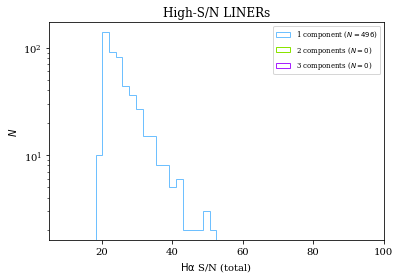

In [19]:
###############################################################################
# Investigating high-S/N LINERs with low EWs: 
# how many kinematic components are fitted?
###############################################################################
cond_highSN_LINER = df["BPT (total)"] == "LINER"
cond_highSN_LINER &= df["HALPHA EW (total)"] < 3
cond_highSN_LINER &= df["HALPHA S/N (total)"] > 20
cond_highSN_LINER &= df["D4000"] > 1.6
cond_highSN_LINER &= df["Number of components"] > 0

df_highSN_LINERs = df[cond_highSN_LINER]

# Look at statistics
df["Number of components"].describe()
df_highSN_LINERs["Number of components"].describe()

colors = ["dodgerblue", "forestgreen", "purple"]
labels = ["1 component fitted", "2 components fitted", "3 components fitted"]

# Show the distribution of each kinematic component separately
fig, ax = plt.subplots(nrows=1, ncols=1)
col_x = "HALPHA S/N (total)"
for nn in range(3 if ncomponents == "recom" else 1):
    ax.hist(df_highSN_LINERs[df_highSN_LINERs["Number of components"] == nn + 1][f"{col_x}"], histtype="step",
            bins=50, range=(eline_SNR_min, 100), color=ncomponents_colours[nn + 1],
            density=False, label=f"{ncomponents_labels[nn + 1]} component{'s' if nn + 1 > 1 else ''}" + r" ($N = %d$)" % df_highSN_LINERs[df_highSN_LINERs["Number of components"] == nn + 1][f"{col_x}"].count())
ax.set_yscale("log")
ax.set_xlabel(label_fn(col_x) + " (total)")
ax.set_ylabel(r"$N$")
ax.set_title("High-S/N LINERs")
ax.autoscale(axis="x", enable=True, tight=True)
ax.legend(loc="upper right", fontsize="x-small")


### Histograms showing the distribution in various systematic, local and global galaxy properties for components with 1, 2 and 3 spaxels

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


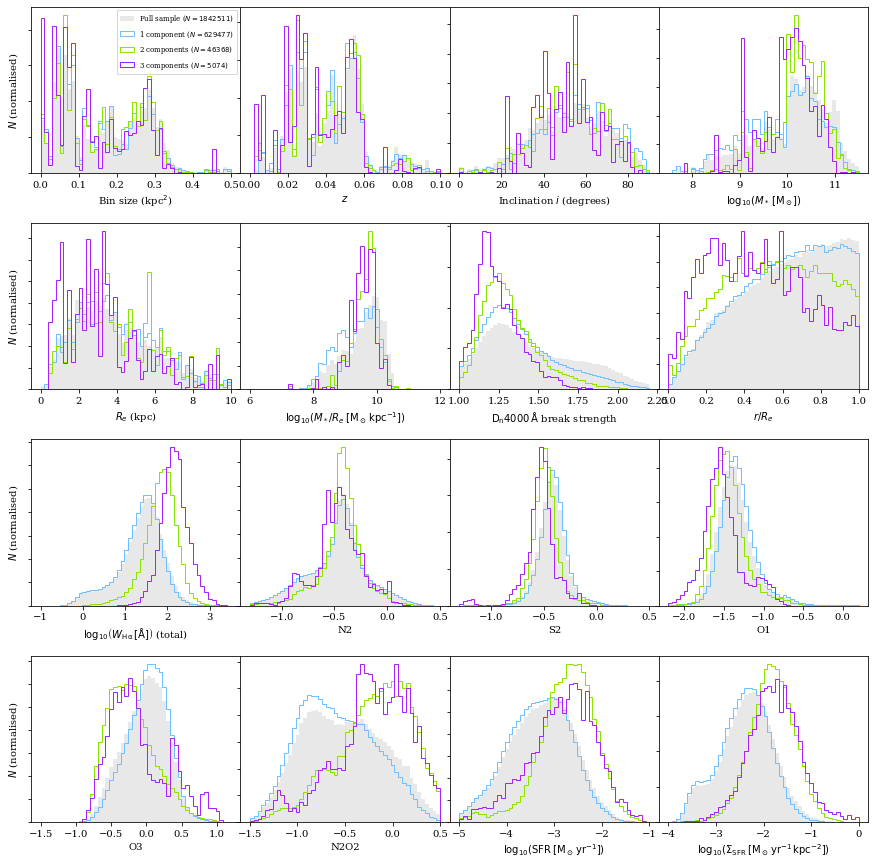

In [20]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.subplots_adjust(wspace=0, hspace=0.3)
bins = 50

for rr, col_x_list in enumerate([["Bin size (square kpc)", "z_spec", "Inclination i (degrees)", "mstar"],
                                 ["R_e (kpc)", "log(M/R_e)", "D4000", "r/R_e"], 
                                 ["log HALPHA EW (total)", "log N2 (total)", "log S2 (total)", "log O1 (total)"],
                                 ["log O3 (total)", "N2O2 (total)", "log SFR (component 0)", "log SFR surface density (component 0)"]]):
    
    # Plot each quantity
    for ax, col_x in zip(axs[rr], col_x_list):
        ax.hist(df[f"{col_x}"],
                bins=bins, range=((vmin_fn(col_x), vmax_fn(col_x))), color="lightgrey", alpha=0.5,
                density=True, label=f"Full sample ($N = %d$)" % df[f"{col_x}"].count())

        # Show the distribution of each kinematic component separately
        for nn, df_subset in enumerate([df_1only, df_2only, df_3only]):
            ax.hist(df_subset[f"{col_x}"], histtype="step",
                    bins=bins, range=((vmin_fn(col_x), vmax_fn(col_x))), color=ncomponents_colours[nn + 1],
                    density=True, label=f"{ncomponents_labels[nn + 1]} component{'s' if nn + 1 > 1 else ''}" + r" ($N = %d$)" % df_subset[f"{col_x}"].count())

        # Decorations
        if col_x == "log HALPHA EW (total)" or col_x == "HALPHA S/N (total)":
            ax.set_xlabel(label_fn(col_x) + " (total)")
        elif col_x == "log HALPHA EW (component 0)" or col_x == "HALPHA S/N (component 0)":
            ax.set_xlabel(label_fn(col_x) + " (component 0)")
        else:
            ax.set_xlabel(label_fn(col_x))
        ax.set_yticklabels([]) if nn > 0 else None
    
    axs[rr][0].set_ylabel(r"$N$ (normalised)")
axs[0][0].legend(fontsize="x-small")

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_1vs2vs3components_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")


### Repeat the above, but for SF spaxels ONLY

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


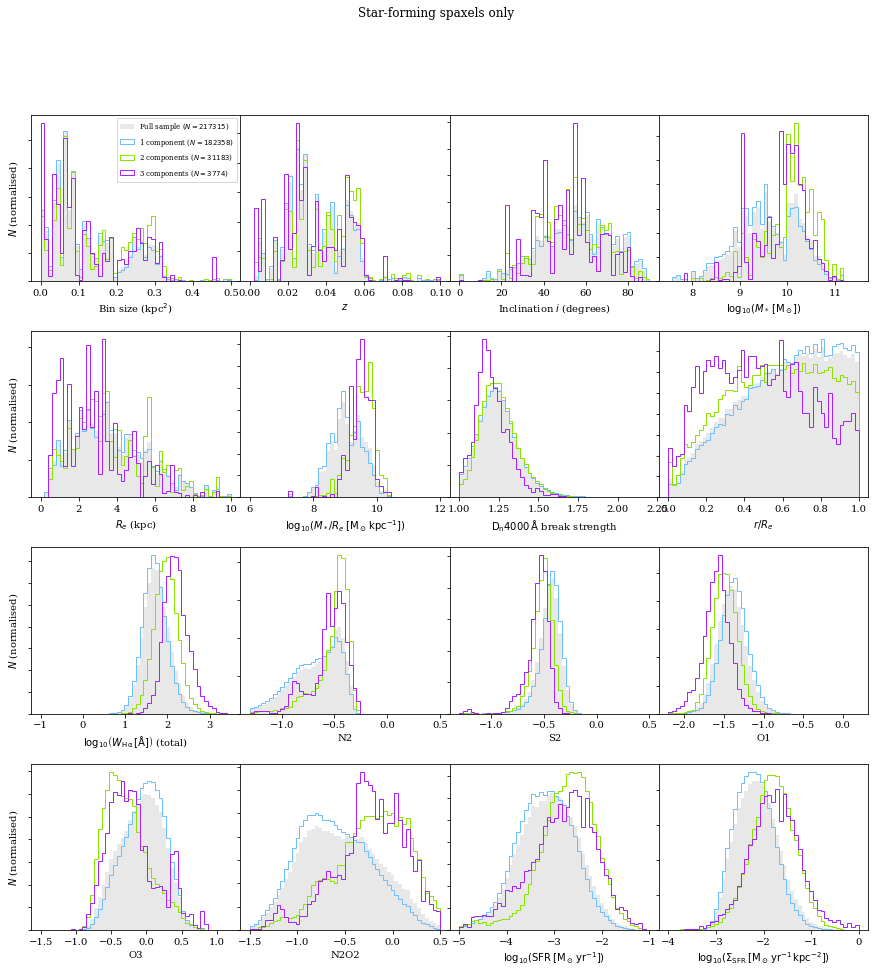

In [21]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.subplots_adjust(wspace=0, hspace=0.3)
bins = 50

for rr, col_x_list in enumerate([["Bin size (square kpc)", "z_spec", "Inclination i (degrees)", "mstar"],
                                 ["R_e (kpc)", "log(M/R_e)", "D4000", "r/R_e"], 
                                 ["log HALPHA EW (total)", "log N2 (total)", "log S2 (total)", "log O1 (total)"],
                                 ["log O3 (total)", "N2O2 (total)", "log SFR (component 0)", "log SFR surface density (component 0)"]]):
    
    # Plot each quantity
    for ax, col_x in zip(axs[rr], col_x_list):
        ax.hist(df_SF[f"{col_x}"],
                bins=bins, range=((vmin_fn(col_x), vmax_fn(col_x))), color="lightgrey", alpha=0.5,
                density=True, label=f"Full sample ($N = %d$)" % df_SF[f"{col_x}"].count())

        # Show the distribution of each kinematic component separately
        for nn, df_subset in enumerate([df_SF_1only, df_SF_2only, df_SF_3only]):
            ax.hist(df_subset[f"{col_x}"], histtype="step",
                    bins=bins, range=((vmin_fn(col_x), vmax_fn(col_x))), color=ncomponents_colours[nn + 1],
                    density=True, label=f"{ncomponents_labels[nn + 1]} component{'s' if nn + 1 > 1 else ''}" + r" ($N = %d$)" % df_subset[f"{col_x}"].count())

        # Decorations
        if col_x == "log HALPHA EW (total)" or col_x == "HALPHA S/N (total)":
            ax.set_xlabel(label_fn(col_x) + " (total)")
        elif col_x == "log HALPHA EW (component 0)" or col_x == "HALPHA S/N (component 0)":
            ax.set_xlabel(label_fn(col_x) + " (component 0)")
        else:
            ax.set_xlabel(label_fn(col_x))
        ax.set_yticklabels([]) if nn > 0 else None
    
    axs[rr][0].set_ylabel(r"$N$ (normalised)")
axs[0][0].legend(fontsize="x-small")
fig.suptitle("Star-forming spaxels only")

# Save
if savefigs:
    fig.savefig(os.path.join(fig_path, f"hist_1vs2vs3components_SF_only_{bin_type}_{ncomponents}.pdf"), format="pdf", bbox_inches="tight")
